In [2]:
import dataflows as DF
from fuzzywuzzy import process, fuzz
import numpy as np
import matplotlib.pyplot as plt

In [3]:
lamas = DF.Flow(
    DF.load('2018.xlsx', headers=4, sheet='נתונים פיזיים ונתוני אוכלוסייה ', deduplicate_headers=True),
    DF.select_fields([
        'שם  הרשות',
        'סה"כ  אוכלוסייה בסוף השנה',
        'ערך מדד (1)',
#         'אשכול סוציו',
    ]),
    DF.filter_rows(lambda r: r['שם  הרשות']),
    DF.concatenate(
        dict(
            name=['שם  הרשות'],
            pop=['סה"כ  אוכלוסייה בסוף השנה'],
            socio=['ערך מדד (1)'],
#             socio=['אשכול סוציו'],
        )
    ),
    DF.update_resource(-1, name='lamas'),
).results()[0][0]
lamas = dict((x['name'], x) for x in lamas)
lamas_cities = list(lamas.keys())
lamas_cities

['אום אל-פחם',
 'אופקים',
 'אור יהודה',
 'אור עקיבא',
 'אילת',
 'אלעד',
 'אריאל',
 'אשדוד',
 'אשקלון',
 'באקה אל-גרביה',
 'באר שבע',
 'בית שאן',
 'בית שמש',
 'ביתר עילית',
 'בני ברק',
 'בת ים',
 'גבעת שמואל',
 'גבעתיים',
 'דימונה',
 'הוד השרון',
 'הרצלייה',
 'חדרה',
 'חולון',
 'חיפה',
 'טבריה',
 'טייבה',
 'טירה',
 'טירת כרמל',
 'טמרה',
 'יבנה',
 'יהוד',
 'יקנעם עילית',
 'ירושלים',
 'כפר יונה',
 'כפר סבא',
 'כפר קאסם',
 'כרמיאל',
 'לוד',
 'מגדל העמק',
 'מודיעין עילית',
 'מודיעין-מכבים-רעות*',
 'מעלה אדומים',
 'מעלות-תרשיחא',
 'נהרייה',
 'נס ציונה',
 'נצרת',
 'נצרת עילית',
 'נשר',
 'נתיבות',
 'נתניה',
 "סח'נין",
 'עכו',
 'עפולה',
 'עראבה',
 'ערד',
 'פתח תקווה',
 'צפת',
 'קלנסווה',
 'קריית אונו',
 'קריית אתא',
 'קריית ביאליק',
 'קריית גת',
 'קריית ים',
 'קריית מוצקין',
 'קריית מלאכי',
 'קריית שמונה',
 'ראש העין',
 'ראשון לציון',
 'רהט',
 'רחובות',
 'רמלה',
 'רמת גן',
 'רמת השרון',
 'רעננה',
 'שדרות',
 'שפרעם',
 'תל אביב -יפו',
 'אבו גוש',
 'אבו סנאן',
 'אבן יהודה',
 'אורנית',
 'אזור',
 'א

In [4]:
def color_code(r):
    if r['score'] > 7.5:
        return 'red'
    if r['score'] > 6:
        return 'orange'
    if r['score'] > 4.5:
        return 'yellow'
    return 'green'

def match(r):
    m = process.extractOne(r['name'], lamas_cities, scorer=fuzz.ratio)
    ret = dict(**lamas[m[0]])
    ret['match'] = m[1]
    return ret

ramzor = DF.Flow(
    DF.load('cities_ramzor_publicb-q.xlsx', sheet='רמזור ערים', headers=1),
    DF.concatenate(dict(
        name=['עיר'],
        score=['ניקוד'],
    )),
    DF.add_field('color', 'string', color_code),
    DF.add_field('lamas', 'object', match),
    DF.add_field('socio', 'number', lambda r: r['lamas']['socio']),
    DF.add_field('pop', 'number', lambda r: r['lamas']['pop']),
    DF.add_field('match', 'number', lambda r: r['lamas']['match']),
    DF.delete_fields(['lamas']),
    # DF.filter_rows(lambda r: r['pop'] > 40000),
    DF.printer(),
    DF.dump_to_path('ramzor_correlation'),
).results()[0][0]
ramzor

concat:
#    name                      score  color            socio         pop       match
     (string)               (number)  (string)      (number)    (number)    (number)
---  -------------------  ----------  ----------  ----------  ----------  ----------
1    כפר קאסם               10        red             -0.786       23242         100
2    לקיה                   10        red             -1.961       13394         100
3    עין מאהל                9.98676  red             -1.177       13130         100
4    דאלית אל-כרמל           9.73893  red             -0.267       17426         100
5    טירה                    9.70873  red             -0.386       26163         100
6    ג'לג'וליה               9.47309  red             -1.066        9983         100
7    מעלה עירון              9.46416  red             -1.193       14833         100
8    עמנואל                  9.43999  red             -1.607        3693         100
9    עספיא                   9.31327  red             -0.

100')},
 {'name': 'קרית שמונה',
  'score': Decimal('5.641117930474181'),
  'color': 'yellow',
  'socio': Decimal('0.016'),
  'pop': Decimal('22624'),
  'match': Decimal('95')},
 {'name': 'קרית גת',
  'score': Decimal('5.620352345796833'),
  'color': 'yellow',
  'socio': Decimal('-0.358'),
  'pop': Decimal('54972'),
  'match': Decimal('93')},
 {'name': 'שעב',
  'score': Decimal('5.615048940674593'),
  'color': 'yellow',
  'socio': Decimal('-1.198'),
  'pop': Decimal('6941'),
  'match': Decimal('100')},
 {'name': 'ראש העין',
  'score': Decimal('5.613625882946571'),
  'color': 'yellow',
  'socio': Decimal('0.638'),
  'pop': Decimal('56344'),
  'match': Decimal('100')},
 {'name': 'שפרעם',
  'score': Decimal('5.602966126745108'),
  'color': 'yellow',
  'socio': Decimal('-0.768'),
  'pop': Decimal('41559'),
  'match': Decimal('100')},
 {'name': 'יסוד המעלה',
  'score': Decimal('5.5878107414608'),
  'color': 'yellow',
  'socio': Decimal('1.148'),
  'pop': Decimal('1719'),
  'match': Decimal('

7950776


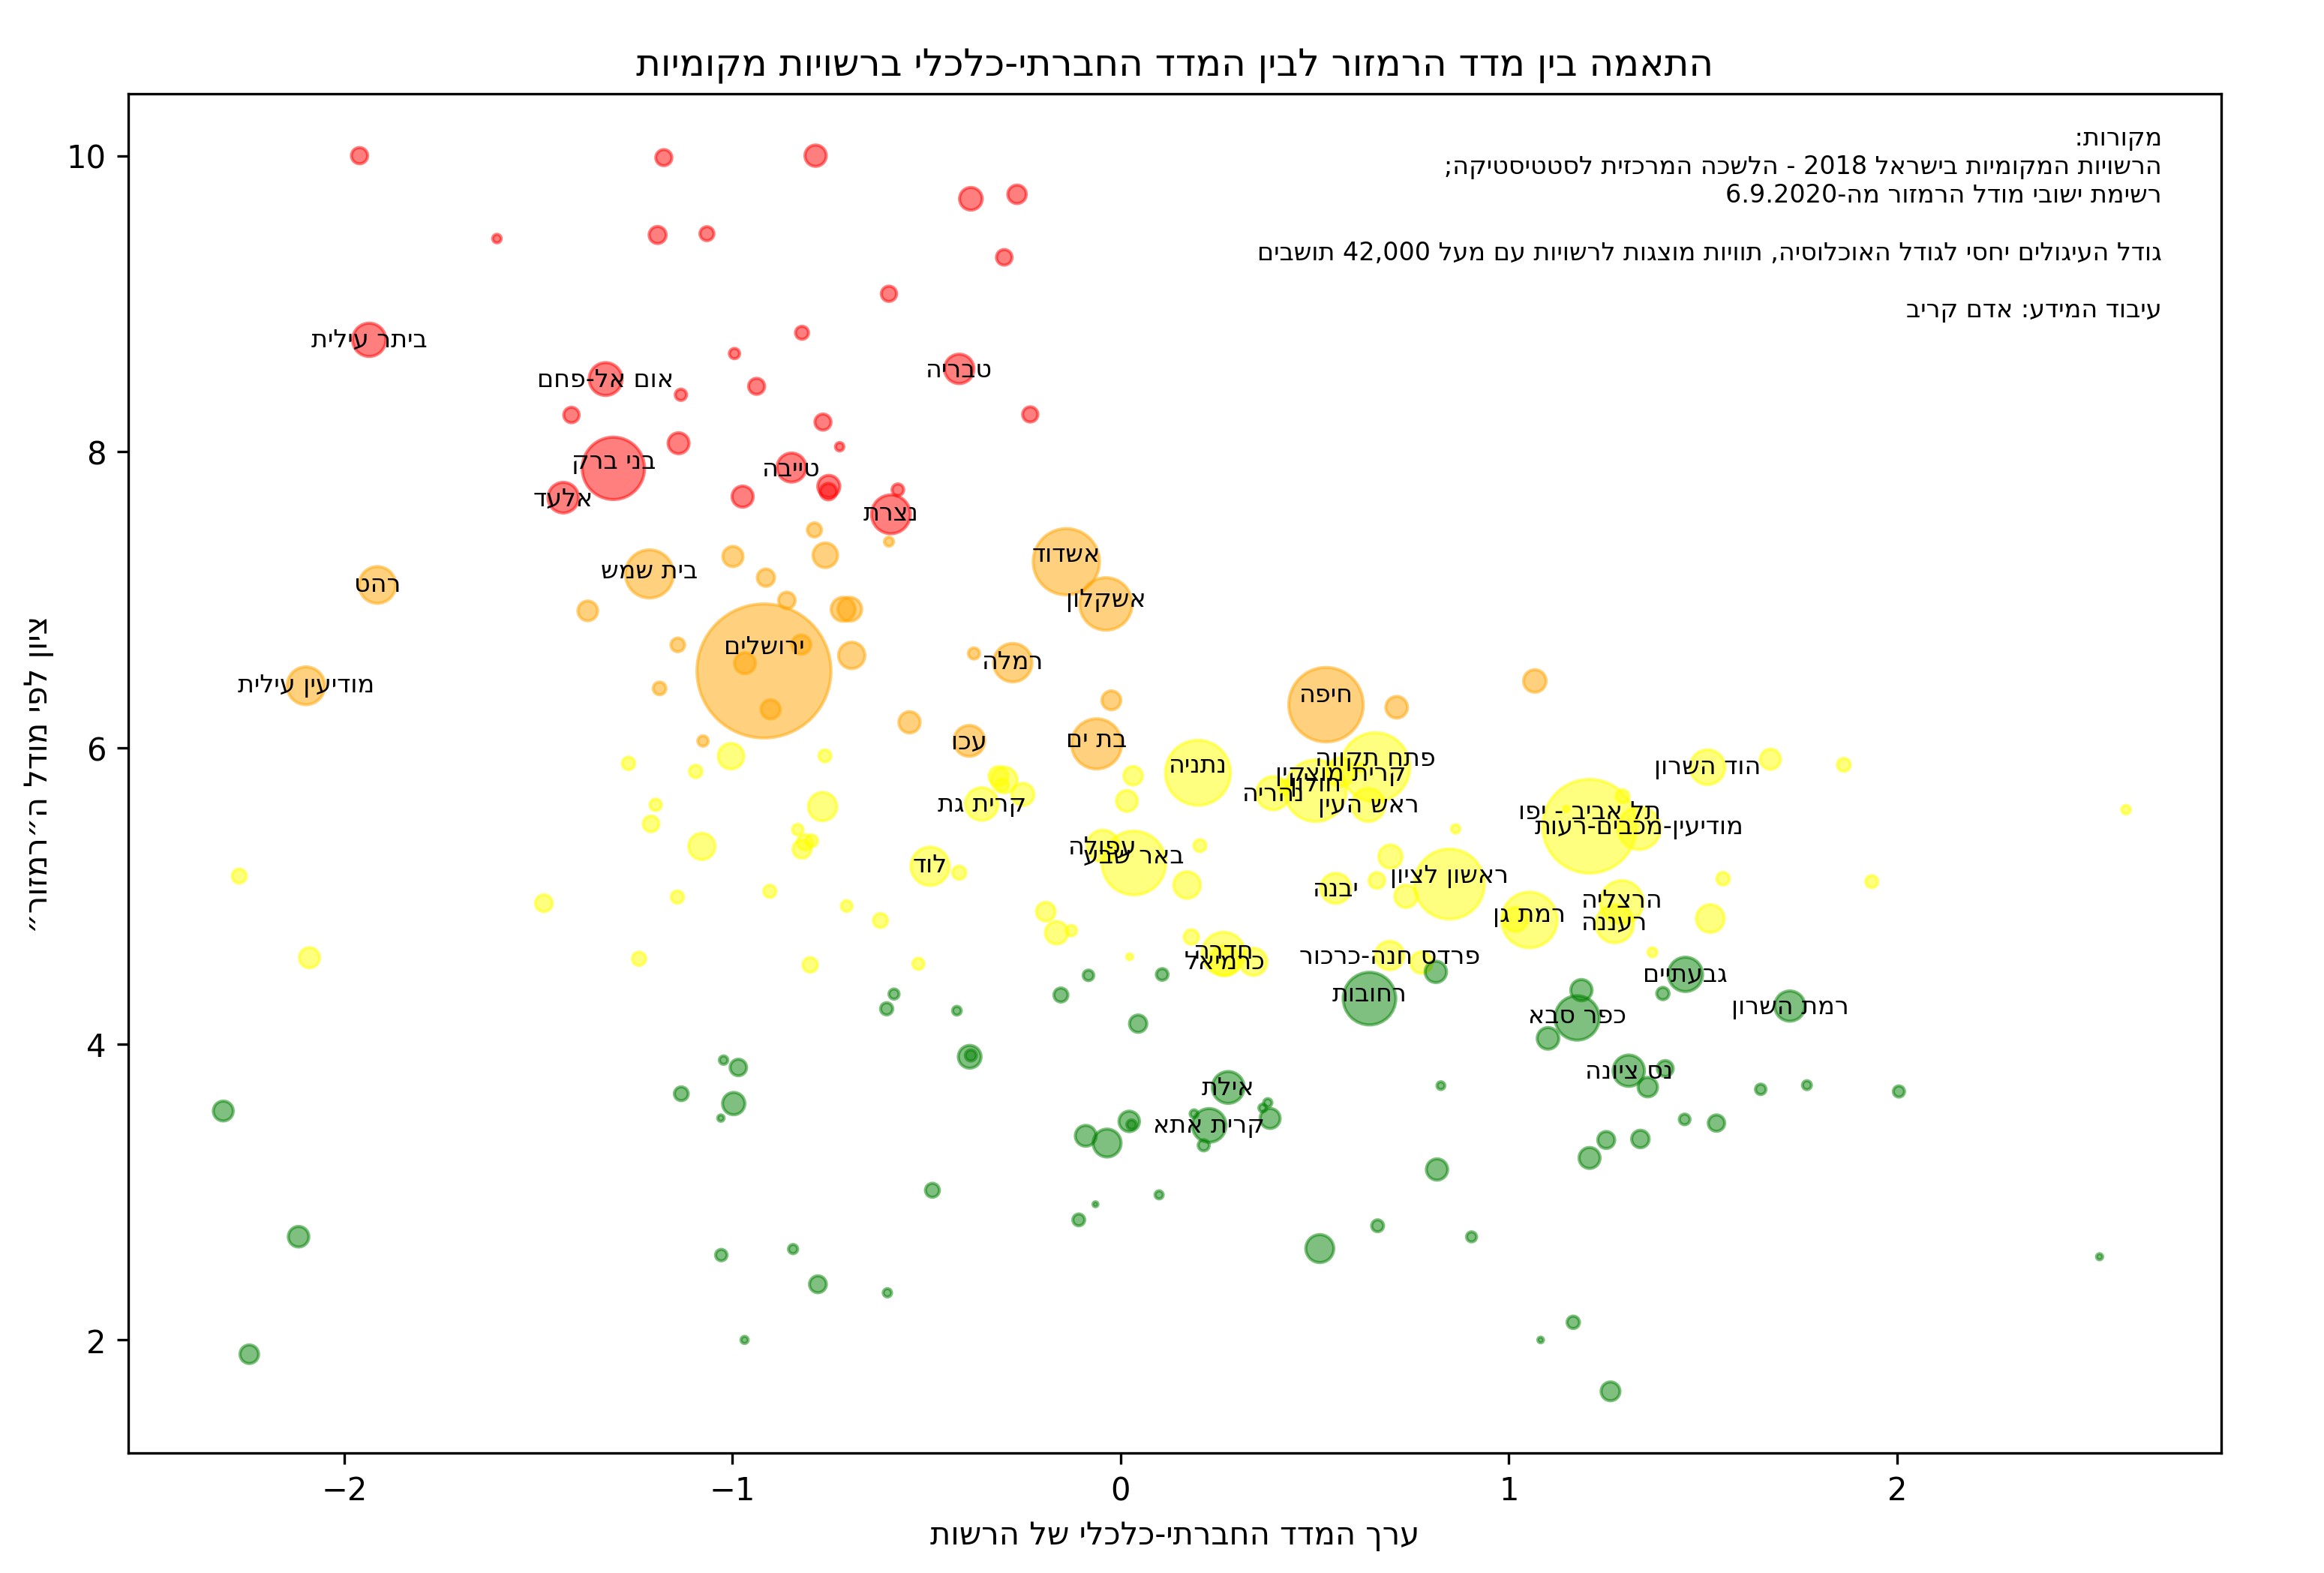

In [5]:
import math

fig=plt.figure(figsize=(12,8), dpi= 300, facecolor='w', edgecolor='k')

x = np.array([i['socio'] for i in ramzor])
y = np.array([i['score'] for i in ramzor])
pop = [i['pop'] for i in ramzor]
s = np.array([float(i['pop'])/500 for i in ramzor])
print(sum(pop))
c = np.array([i['color'] for i in ramzor])
plt.scatter(x, y, s=s, c=c, alpha=0.5)

for i in ramzor:
    if i['pop'] > 42000:
        r = math.sqrt(float(i['pop'])/500)
        plt.annotate(i['name'][::-1], xy=(i['socio'], i['score']), xytext=(0, r - 20), textcoords='offset pixels',
                     ha='center', fontsize=8)
    
    
sources = 'מקורות: '[::-1] + '\n' +\
    'הרשויות המקומיות בישראל 8102 - הלשכה המרכזית לסטטיסטיקה;'[::-1] + '\n' +\
    'רשימת ישובי מודל הרמזור מה-0202.9.6'[::-1] + '\n\n' + \
    'גודל העיגולים יחסי לגודל האוכלוסיה, תוויות מוצגות לרשויות עם מעל 000,24 תושבים'[::-1] + '\n\n' +\
    'עיבוד המידע: אדם קריב'[::-1]

plt.annotate(sources, (0.93, 0.92), xycoords='figure fraction',
             ha='right', va='top', fontsize=8)

plt.xlabel('ערך המדד החברתי-כלכלי של הרשות'[::-1])
plt.ylabel('ציון לפי מודל ה״רמזור״'[::-1])
plt.title('התאמה בין מדד הרמזור לבין המדד החברתי-כלכלי ברשויות מקומיות'[::-1])
plt.show()
